In [27]:
# Linear Algebra and 
import numpy as np

# Database
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# getting data
import requests
from pandas_datareader import wb

# Web application
# pip install streamlit
import streamlit as st

In [28]:
undernourishment="SN.ITK.DEFC.ZS"

In [29]:
year = "2014"
df1=wb.download(indicator=undernourishment, country="all", start=year,end=year).reset_index()
df1 = df1.drop("country", axis =1).rename(columns = {undernourishment:"value"})

year = "2015"
df2=wb.download(indicator=undernourishment, country="all", start=year,end=year).reset_index()
df2 = df2.drop("country", axis =1).rename(columns = {undernourishment:"value"})

year = "2016"
df3=wb.download(indicator=undernourishment, country="all", start=year,end=year).reset_index()
df3 = df3.drop("country", axis =1).rename(columns = {undernourishment:"value"})

year = "2017"
df4=wb.download(indicator=undernourishment, country="all", start=year,end=year).reset_index()
df4 = df4.drop("country", axis =1).rename(columns = {undernourishment:"value"})

year = "2018"
df5=wb.download(indicator=undernourishment, country="all", start=year,end=year).reset_index()
df5 = df5.drop("country", axis =1).rename(columns = {undernourishment:"value"})

year = "2019"
df6=wb.download(indicator=undernourishment, country="all", start=year,end=year).reset_index()
df6 = df6.drop("country", axis =1).rename(columns = {undernourishment:"value"})

In [30]:
hunger = df1.append(df2).append(df3).append(df4).append(df5).append(df6).dropna()

In [31]:
hunger

,year,value
0,2014,23.221891
1,2014,11.919088
2,2014,13.074471
3,2014,7.927996
4,2014,2.709416
...,...,...
257,2019,2.500000
258,2019,9.300000
259,2019,27.400000
260,2019,6.700000


In [35]:
np.array(hunger["year"])

array(['2014', '2014', '2014', ..., '2019', '2019', '2019'], dtype=object)

/Users/pravesh/opt/anaconda3/envs/ML/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/Users/pravesh/opt/anaconda3/envs/ML/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


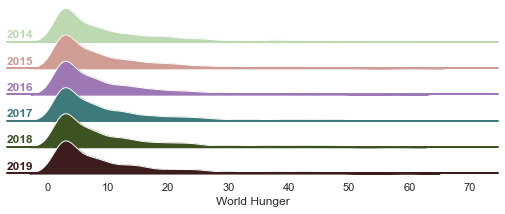

In [107]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(6, rot=2, light=.8)
plot = sns.FacetGrid(hunger, row="year", hue="year", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
plot.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
plot.map(sns.kdeplot, "value", clip_on=False, color="w", lw=1, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
plot.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    

plot.map(label, "value")

# Set the subplots to overlap
plot.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
plot.set_titles("")
plot.set(yticks=[], ylabel="")
plot.set(xlabel="World Hunger")
plot.despine(bottom=True, left=True)